Стратегия антицикличного инвестирования.
Здесь смотрю спреды между мусорными облигациями и бондами, наклон кривой доходности, строю скользящие средние для s&p500, золота и битка.

Для ознакомления со стратегией советую этот ролик:
https://www.youtube.com/watch?v=MloMxL3mZv0&t=211s

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy import stats

In [2]:
spread = pd.read_csv('spread.csv')

In [3]:
spread.columns = ['date', 'spread']

In [4]:
spread = spread.set_index('date')

In [5]:
sp = pd.to_numeric(spread.spread, errors='coerce').dropna()

<AxesSubplot:xlabel='date'>

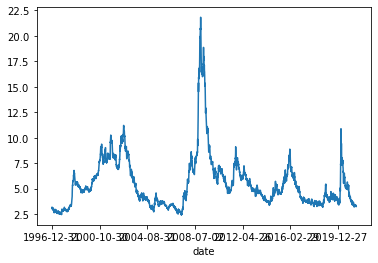

In [6]:
sp.plot()

In [7]:
tmedian = sp.rolling(250*10).median().dropna()

In [8]:
tmedian = pd.DataFrame(tmedian)
tmedian.columns = ['10y median']
sp = pd.DataFrame(sp)

In [9]:
spread10y = sp.join(tmedian).dropna()

<AxesSubplot:xlabel='date'>

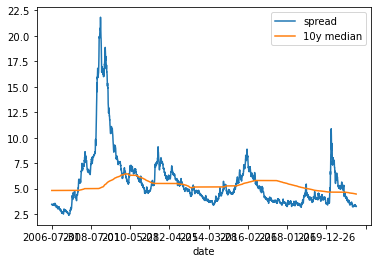

In [10]:
spread10y.plot()

In [47]:
y_curve = pd.read_csv('usyield.csv', sep=';')

In [48]:
y_curve = y_curve.reset_index()

In [49]:
y_curve.columns = y_curve.iloc[0]

In [50]:
y_curve = y_curve.drop(0, axis=0)

In [45]:
y_curve = y_curve.set_index('Date')

In [51]:
y_curve['Date'] =pd.to_datetime(y_curve['Date'])
y_curve = y_curve.set_index('Date')

In [58]:
y_curve = y_curve.astype('float')

In [55]:
y_curve[['2 Yr','10 Yr']].iloc[0].values

array(['7.87', '7.94'], dtype=object)

In [59]:
slopes = list()
for i in range(len(y_curve)):
    slope, intercept, r_value, p_value, std_err = stats.linregress([2,10],y_curve[['2 Yr','10 Yr']].iloc[i].values)
    slopes.append(abs(slope))

In [60]:
slopes = pd.DataFrame(slopes)

In [61]:
slope = slopes.rolling(250*8).median()
slope.columns = ['slope']

In [62]:
slopes = slopes.join(slope)

In [63]:
slopes.columns = ['slope', '10y median']

In [64]:
slopes['date'] = y_curve.index

In [65]:
slopes = slopes.set_index('date')

In [66]:
t = yf.Ticker('SPY')
spy = t.history(period='max')
spy_roll = spy['Close'].rolling(200).mean().dropna()
spy_roll_50 = spy['Close'].rolling(50).mean().dropna()
spy_curve = spy.join(spy_roll, rsuffix='_roll200')[['Close','Close_roll200']]
spy_curve = spy_curve.join(spy_roll_50, rsuffix='_roll50')[['Close','Close_roll200','Close_roll50']]

In [67]:
t = yf.Ticker('GLD')
gold = t.history(period='max')
gold_roll = gold['Close'].rolling(200).mean().dropna()
gold_roll_50 = gold['Close'].rolling(50).mean().dropna()
gold_curve = gold.join(gold_roll, rsuffix='_roll200')[['Close','Close_roll200']]
gold_curve = gold_curve.join(gold_roll_50, rsuffix='_roll50')[['Close','Close_roll200','Close_roll50']]

In [68]:
t = yf.Ticker('BTC-USD')
btc = t.history(period='max')
btc_roll_200 = btc['Close'].rolling(200).mean().dropna()
btc_roll_50 = btc['Close'].rolling(50).mean().dropna()
btc_curve = btc.join(btc_roll_200, rsuffix='_roll200')[['Close','Close_roll200']]
btc_curve = btc_curve.join(btc_roll_50, rsuffix='_roll50')[['Close','Close_roll200','Close_roll50']]

<AxesSubplot:title={'center':'BTC'}, xlabel='Date'>

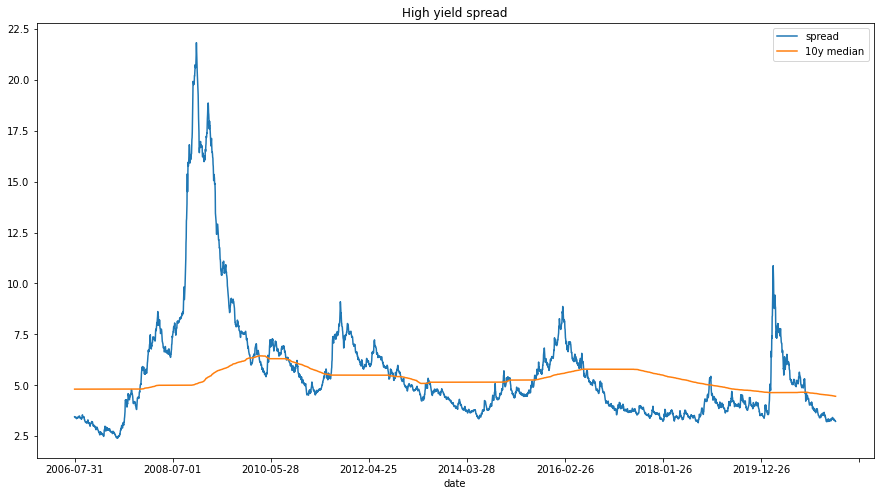

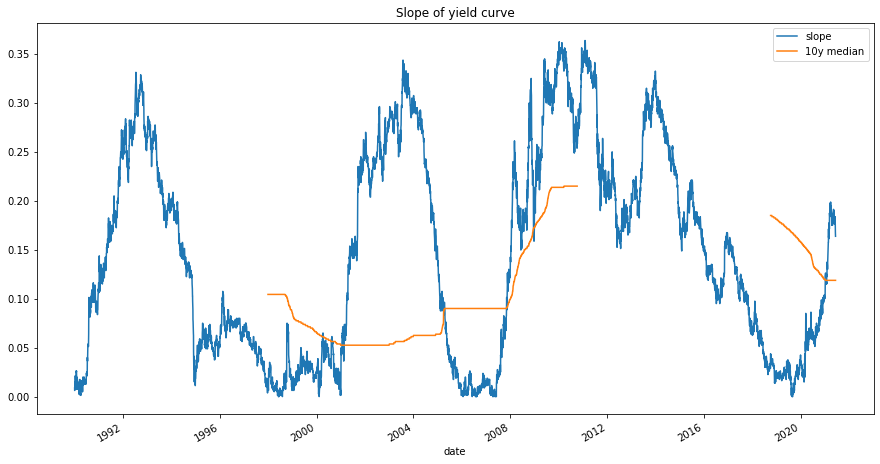

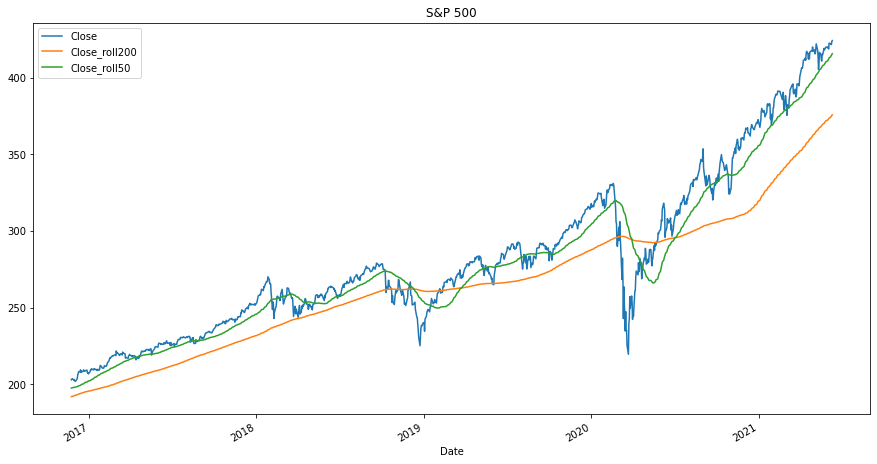

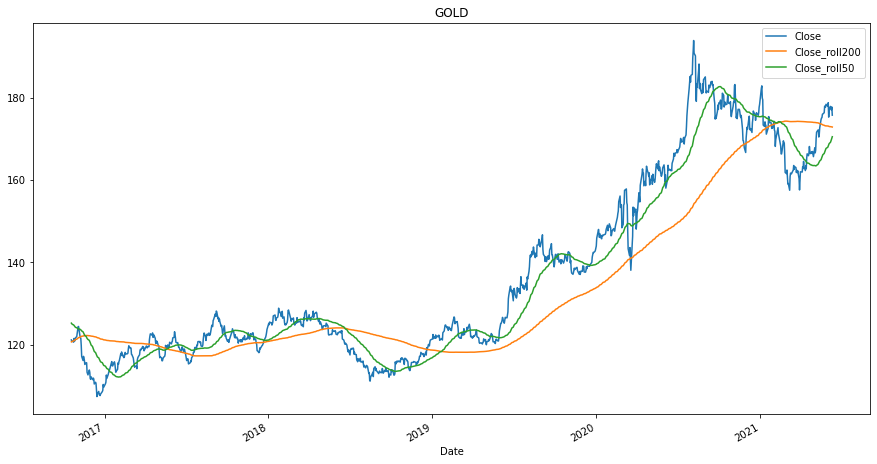

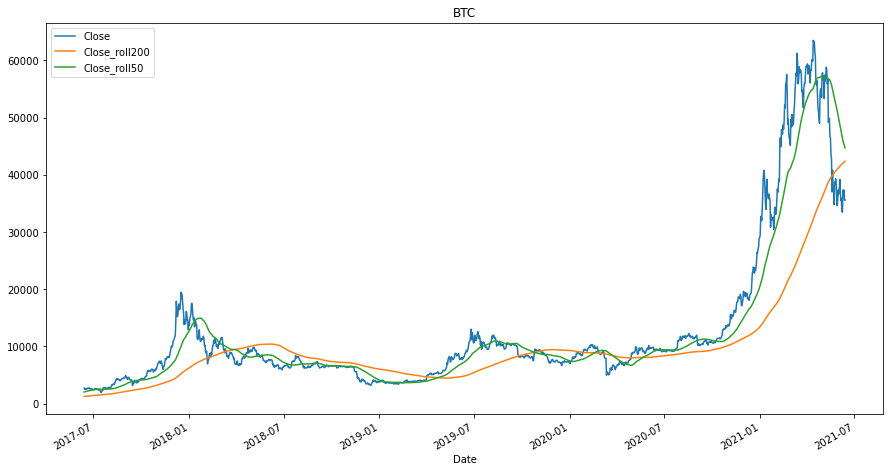

In [74]:
spread10y[['spread', '10y median']].plot(figsize=(15,8), title='High yield spread')
slopes[['slope', '10y median']][:].plot(figsize=(15,8), title='Slope of yield curve')
spy_curve[['Close', 'Close_roll200', 'Close_roll50']][6000:].plot(figsize=(15,8), title = 'S&P 500')
gold_curve[['Close', 'Close_roll200', 'Close_roll50']][3000:].plot(figsize=(15,8), title = 'GOLD')
btc_curve[['Close', 'Close_roll200', 'Close_roll50']][1000:].plot(figsize=(15,8), title = 'BTC')

Пока не понял, почему так плохо строится 10-ти летняя скользящая медиана для угла кривой доходности. Нужно будет посмотреть данные.

Краткие выводы из графиков на 13 июня 2021:
- Крайне маленький спред между мусорными облигациями и бондами
- Угол наклона доходности выше 8-ми летней скользаящей медианы
- S&P на хаях
- Золото пробило 200-дневную скользящую среднюю и возможно сейчас будет тестировать ее сверху
- Биткоин уже месяц ниже 200-днейной скользящей

Исходя из этого, стратегия на ближайшие 3 месяца следующая:
50% IG bonds, 40% US Treasures, 10% Small Caps